In [1]:
import pandas as pd
import numpy as np
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split


In [2]:
all_files = glob.glob("D:/project/*.csv")

all_files

['D:/project\\data_csv (1).csv',
 'D:/project\\data_csv (10).csv',
 'D:/project\\data_csv (11).csv',
 'D:/project\\data_csv (12).csv',
 'D:/project\\data_csv (13).csv',
 'D:/project\\data_csv (14).csv',
 'D:/project\\data_csv (15).csv',
 'D:/project\\data_csv (16).csv',
 'D:/project\\data_csv (17).csv',
 'D:/project\\data_csv (18).csv',
 'D:/project\\data_csv (19).csv',
 'D:/project\\data_csv (2).csv',
 'D:/project\\data_csv (20).csv',
 'D:/project\\data_csv (21).csv',
 'D:/project\\data_csv (22).csv',
 'D:/project\\data_csv (23).csv',
 'D:/project\\data_csv (3).csv',
 'D:/project\\data_csv (4).csv',
 'D:/project\\data_csv (5).csv',
 'D:/project\\data_csv (6).csv',
 'D:/project\\data_csv (7).csv',
 'D:/project\\data_csv (8).csv',
 'D:/project\\data_csv (9).csv']

In [3]:
list_df =[]
for csvfile in all_files:
    
    
    try:
        df=pd.read_csv(csvfile, encoding = 'utf-8')
        
        
    except UnicodeDecodeError:
        df =pd.read_csv(csvfile, encoding = 'latin1')
        
    list_df.append(df)
        
merged_df = pd.concat(list_df,ignore_index = True)

merged_df

,State Code,District Code,India/States,Division,Group,Class,NIC Name,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,...,Main Workers - Urban - Females,Marginal Workers - Total - Persons,Marginal Workers - Total - Males,Marginal Workers - Total - Females,Marginal Workers - Rural - Persons,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females
0,`08,`000,STATE - RAJASTHAN,`00,`000,`0000,Total,9017944,7594737,1423207,...,618445,2307752,1046813,1260939,1825830,749381,1076449,481922,297432,184490
1,`08,`000,STATE - RAJASTHAN,`01,`000,`0000,"Crop and animal production, hunting and relate...",450766,201572,249194,...,19810,408728,76106,332622,390864,71124,319740,17864,4982,12882
2,`08,`000,STATE - RAJASTHAN,`01,`011,`0000,Growing of non-perennial crops,12876,10547,2329,...,1013,9562,4051,5511,8147,3295,4852,1415,756,659
3,`08,`000,STATE - RAJASTHAN,`01,`011,`0111,"Growing of cereals (except rice), leguminous c...",12061,9911,2150,...,942,9085,3883,5202,7777,3161,4616,1308,722,586
4,`08,`000,STATE - RAJASTHAN,`01,`011,`0112,Growing of rice,79,71,8,...,2,13,4,9,11,2,9,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195140,`24,`493,District - Tapi,`99,`000,`0000,Activities of extraterritorial organizations a...,216,134,82,...,2,40,8,32,26,6,20,14,2,12
195141,`24,`493,District - Tapi,`99,`991,`0000,Blank,140,82,58,...,2,16,8,8,8,6,2,8,2,6
195142,`24,`493,District - Tapi,`99,`991,`9910,Blank,140,82,58,...,2,16,8,8,8,6,2,8,2,6
195143,`24,`493,District - Tapi,`99,`992,`0000,Incomplete description/ Wrongly Classifed,76,52,24,...,0,24,0,24,18,0,18,6,0,6


In [4]:
df = merged_df

In [5]:
df.columns

Index(['State Code', 'District Code', 'India/States', 'Division', 'Group',
       'Class', 'NIC Name', 'Main Workers - Total -  Persons',
       'Main Workers - Total - Males', 'Main Workers - Total - Females',
       'Main Workers - Rural -  Persons', 'Main Workers - Rural - Males',
       'Main Workers - Rural - Females', 'Main Workers - Urban -  Persons',
       'Main Workers - Urban - Males', 'Main Workers - Urban - Females',
       'Marginal Workers - Total -  Persons',
       'Marginal Workers - Total - Males',
       'Marginal Workers - Total - Females',
       'Marginal Workers - Rural -  Persons',
       'Marginal Workers - Rural - Males',
       'Marginal Workers - Rural - Females',
       'Marginal Workers - Urban -  Persons',
       'Marginal Workers - Urban - Males',
       'Marginal Workers - Urban - Females'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195145 entries, 0 to 195144
Data columns (total 25 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   State Code                           195145 non-null  object
 1   District Code                        195145 non-null  object
 2   India/States                         195145 non-null  object
 3   Division                             195145 non-null  object
 4   Group                                195145 non-null  object
 5   Class                                195145 non-null  object
 6   NIC Name                             195145 non-null  object
 7   Main Workers - Total -  Persons      195145 non-null  int64 
 8   Main Workers - Total - Males         195145 non-null  int64 
 9   Main Workers - Total - Females       195145 non-null  int64 
 10  Main Workers - Rural -  Persons      195145 non-null  int64 
 11  Main Workers - Rural - Mal

In [7]:
df.head()

,State Code,District Code,India/States,Division,Group,Class,NIC Name,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,...,Main Workers - Urban - Females,Marginal Workers - Total - Persons,Marginal Workers - Total - Males,Marginal Workers - Total - Females,Marginal Workers - Rural - Persons,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females
0,`08,`000,STATE - RAJASTHAN,`00,`000,`0000,Total,9017944,7594737,1423207,...,618445,2307752,1046813,1260939,1825830,749381,1076449,481922,297432,184490
1,`08,`000,STATE - RAJASTHAN,`01,`000,`0000,"Crop and animal production, hunting and relate...",450766,201572,249194,...,19810,408728,76106,332622,390864,71124,319740,17864,4982,12882
2,`08,`000,STATE - RAJASTHAN,`01,`011,`0000,Growing of non-perennial crops,12876,10547,2329,...,1013,9562,4051,5511,8147,3295,4852,1415,756,659
3,`08,`000,STATE - RAJASTHAN,`01,`011,`0111,"Growing of cereals (except rice), leguminous c...",12061,9911,2150,...,942,9085,3883,5202,7777,3161,4616,1308,722,586
4,`08,`000,STATE - RAJASTHAN,`01,`011,`0112,Growing of rice,79,71,8,...,2,13,4,9,11,2,9,2,2,0


In [8]:
df.tail()

,State Code,District Code,India/States,Division,Group,Class,NIC Name,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,...,Main Workers - Urban - Females,Marginal Workers - Total - Persons,Marginal Workers - Total - Males,Marginal Workers - Total - Females,Marginal Workers - Rural - Persons,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females
195140,`24,`493,District - Tapi,`99,`000,`0000,Activities of extraterritorial organizations a...,216,134,82,...,2,40,8,32,26,6,20,14,2,12
195141,`24,`493,District - Tapi,`99,`991,`0000,Blank,140,82,58,...,2,16,8,8,8,6,2,8,2,6
195142,`24,`493,District - Tapi,`99,`991,`9910,Blank,140,82,58,...,2,16,8,8,8,6,2,8,2,6
195143,`24,`493,District - Tapi,`99,`992,`0000,Incomplete description/ Wrongly Classifed,76,52,24,...,0,24,0,24,18,0,18,6,0,6
195144,`24,`493,District - Tapi,`99,`992,`9920,Incomplete description/ Wrongly Classifed,76,52,24,...,0,24,0,24,18,0,18,6,0,6


In [9]:
df.shape

(195145, 25)

In [10]:
df.dtypes

State Code                             object
District Code                          object
India/States                           object
Division                               object
Group                                  object
Class                                  object
NIC Name                               object
Main Workers - Total -  Persons         int64
Main Workers - Total - Males            int64
Main Workers - Total - Females          int64
Main Workers - Rural -  Persons         int64
Main Workers - Rural - Males            int64
Main Workers - Rural - Females          int64
Main Workers - Urban -  Persons         int64
Main Workers - Urban - Males            int64
Main Workers - Urban - Females          int64
Marginal Workers - Total -  Persons     int64
Marginal Workers - Total - Males        int64
Marginal Workers - Total - Females      int64
Marginal Workers - Rural -  Persons     int64
Marginal Workers - Rural - Males        int64
Marginal Workers - Rural - Females

In [11]:
# Convert to string and remove non-numeric characters for each column
df["State Code"] = df["State Code"].astype(str).str.replace(r'\D', '', regex=True).astype(int)
df["District Code"] = df["District Code"].astype(str).str.replace(r'\D', '', regex=True).astype(int)
df["Division"] = df["Division"].astype(str).str.replace(r'\D', '', regex=True).astype(int)
df["Group"] = df["Group"].astype(str).str.replace(r'\D', '', regex=True).astype(int)
df["Class"] = df["Class"].astype(str).str.replace(r'\D', '', regex=True).astype(int)


In [12]:
df.isnull().sum()

State Code                             0
District Code                          0
India/States                           0
Division                               0
Group                                  0
Class                                  0
NIC Name                               0
Main Workers - Total -  Persons        0
Main Workers - Total - Males           0
Main Workers - Total - Females         0
Main Workers - Rural -  Persons        0
Main Workers - Rural - Males           0
Main Workers - Rural - Females         0
Main Workers - Urban -  Persons        0
Main Workers - Urban - Males           0
Main Workers - Urban - Females         0
Marginal Workers - Total -  Persons    0
Marginal Workers - Total - Males       0
Marginal Workers - Total - Females     0
Marginal Workers - Rural -  Persons    0
Marginal Workers - Rural - Males       0
Marginal Workers - Rural - Females     0
Marginal Workers - Urban -  Persons    0
Marginal Workers - Urban - Males       0
Marginal Workers

In [13]:
df.columns

Index(['State Code', 'District Code', 'India/States', 'Division', 'Group',
       'Class', 'NIC Name', 'Main Workers - Total -  Persons',
       'Main Workers - Total - Males', 'Main Workers - Total - Females',
       'Main Workers - Rural -  Persons', 'Main Workers - Rural - Males',
       'Main Workers - Rural - Females', 'Main Workers - Urban -  Persons',
       'Main Workers - Urban - Males', 'Main Workers - Urban - Females',
       'Marginal Workers - Total -  Persons',
       'Marginal Workers - Total - Males',
       'Marginal Workers - Total - Females',
       'Marginal Workers - Rural -  Persons',
       'Marginal Workers - Rural - Males',
       'Marginal Workers - Rural - Females',
       'Marginal Workers - Urban -  Persons',
       'Marginal Workers - Urban - Males',
       'Marginal Workers - Urban - Females'],
      dtype='object')

In [14]:
df=df.drop(columns=["Main Workers - Total - Males","Main Workers - Total - Females","Main Workers - Rural - Males","Main Workers - Rural - Females","Main Workers - Urban - Males","Main Workers - Urban - Females","Marginal Workers - Total - Males","Marginal Workers - Total - Females","Marginal Workers - Rural - Males","Marginal Workers - Rural - Females","Marginal Workers - Urban - Males","Marginal Workers - Urban - Females"])


In [15]:
df

,State Code,District Code,India/States,Division,Group,Class,NIC Name,Main Workers - Total - Persons,Main Workers - Rural - Persons,Main Workers - Urban - Persons,Marginal Workers - Total - Persons,Marginal Workers - Rural - Persons,Marginal Workers - Urban - Persons
0,8,0,STATE - RAJASTHAN,0,0,0,Total,9017944,4469555,4548389,2307752,1825830,481922
1,8,0,STATE - RAJASTHAN,1,0,0,"Crop and animal production, hunting and relate...",450766,391263,59503,408728,390864,17864
2,8,0,STATE - RAJASTHAN,1,11,0,Growing of non-perennial crops,12876,5644,7232,9562,8147,1415
3,8,0,STATE - RAJASTHAN,1,11,111,"Growing of cereals (except rice), leguminous c...",12061,5195,6866,9085,7777,1308
4,8,0,STATE - RAJASTHAN,1,11,112,Growing of rice,79,48,31,13,11,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195140,24,493,District - Tapi,99,0,0,Activities of extraterritorial organizations a...,216,154,62,40,26,14
195141,24,493,District - Tapi,99,991,0,Blank,140,84,56,16,8,8
195142,24,493,District - Tapi,99,991,9910,Blank,140,84,56,16,8,8
195143,24,493,District - Tapi,99,992,0,Incomplete description/ Wrongly Classifed,76,70,6,24,18,6


In [16]:
df = df.rename(columns={
    "India/States": "States",
    "NIC Name":"NIC_Name",
    "Main Workers - Total -  Persons": "Main Workers",
    "Main Workers - Rural -  Persons": "Main Workers Rural",
    "Main Workers - Urban -  Persons": "Main Workers Urban",
    "Marginal Workers - Total -  Persons": "Marginal Workers",
    "Marginal Workers - Rural -  Persons": "Marginal Workers Rural",
    "Marginal Workers - Urban -  Persons": "Marginal Workers Urban",
})


In [17]:
df

,State Code,District Code,States,Division,Group,Class,NIC_Name,Main Workers,Main Workers Rural,Main Workers Urban,Marginal Workers,Marginal Workers Rural,Marginal Workers Urban
0,8,0,STATE - RAJASTHAN,0,0,0,Total,9017944,4469555,4548389,2307752,1825830,481922
1,8,0,STATE - RAJASTHAN,1,0,0,"Crop and animal production, hunting and relate...",450766,391263,59503,408728,390864,17864
2,8,0,STATE - RAJASTHAN,1,11,0,Growing of non-perennial crops,12876,5644,7232,9562,8147,1415
3,8,0,STATE - RAJASTHAN,1,11,111,"Growing of cereals (except rice), leguminous c...",12061,5195,6866,9085,7777,1308
4,8,0,STATE - RAJASTHAN,1,11,112,Growing of rice,79,48,31,13,11,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195140,24,493,District - Tapi,99,0,0,Activities of extraterritorial organizations a...,216,154,62,40,26,14
195141,24,493,District - Tapi,99,991,0,Blank,140,84,56,16,8,8
195142,24,493,District - Tapi,99,991,9910,Blank,140,84,56,16,8,8
195143,24,493,District - Tapi,99,992,0,Incomplete description/ Wrongly Classifed,76,70,6,24,18,6


In [18]:
df.iloc[:7]

,State Code,District Code,States,Division,Group,Class,NIC_Name,Main Workers,Main Workers Rural,Main Workers Urban,Marginal Workers,Marginal Workers Rural,Marginal Workers Urban
0,8,0,STATE - RAJASTHAN,0,0,0,Total,9017944,4469555,4548389,2307752,1825830,481922
1,8,0,STATE - RAJASTHAN,1,0,0,"Crop and animal production, hunting and relate...",450766,391263,59503,408728,390864,17864
2,8,0,STATE - RAJASTHAN,1,11,0,Growing of non-perennial crops,12876,5644,7232,9562,8147,1415
3,8,0,STATE - RAJASTHAN,1,11,111,"Growing of cereals (except rice), leguminous c...",12061,5195,6866,9085,7777,1308
4,8,0,STATE - RAJASTHAN,1,11,112,Growing of rice,79,48,31,13,11,2
5,8,0,STATE - RAJASTHAN,1,11,113,"Growing of vegetables and melons, roots and tu...",576,304,272,319,263,56
6,8,0,STATE - RAJASTHAN,1,11,114,Growing of sugar cane,11,6,5,0,0,0


In [19]:
columns_name = df.columns[:17]
df[columns_name]

,State Code,District Code,States,Division,Group,Class,NIC_Name,Main Workers,Main Workers Rural,Main Workers Urban,Marginal Workers,Marginal Workers Rural,Marginal Workers Urban
0,8,0,STATE - RAJASTHAN,0,0,0,Total,9017944,4469555,4548389,2307752,1825830,481922
1,8,0,STATE - RAJASTHAN,1,0,0,"Crop and animal production, hunting and relate...",450766,391263,59503,408728,390864,17864
2,8,0,STATE - RAJASTHAN,1,11,0,Growing of non-perennial crops,12876,5644,7232,9562,8147,1415
3,8,0,STATE - RAJASTHAN,1,11,111,"Growing of cereals (except rice), leguminous c...",12061,5195,6866,9085,7777,1308
4,8,0,STATE - RAJASTHAN,1,11,112,Growing of rice,79,48,31,13,11,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195140,24,493,District - Tapi,99,0,0,Activities of extraterritorial organizations a...,216,154,62,40,26,14
195141,24,493,District - Tapi,99,991,0,Blank,140,84,56,16,8,8
195142,24,493,District - Tapi,99,991,9910,Blank,140,84,56,16,8,8
195143,24,493,District - Tapi,99,992,0,Incomplete description/ Wrongly Classifed,76,70,6,24,18,6


In [20]:
vectorizer = TfidfVectorizer(stop_words='english')
industry_tfidf = vectorizer.fit_transform(df['NIC_Name'])

# Applying KMeans to cluster industries based on textual similarity
kmeans_text = KMeans(n_clusters=5, random_state=42)
df['text_cluster'] = kmeans_text.fit_predict(industry_tfidf)

# View the results
df[['NIC_Name', 'text_cluster']]

C:\Users\deepa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,NIC_Name,text_cluster
0,Total,0
1,"Crop and animal production, hunting and relate...",1
2,Growing of non-perennial crops,0
3,"Growing of cereals (except rice), leguminous c...",0
4,Growing of rice,0
...,...,...
195140,Activities of extraterritorial organizations a...,1
195141,Blank,0
195142,Blank,0
195143,Incomplete description/ Wrongly Classifed,0


Column: Main Workers
Data points before cleaning: 195145
Data points after cleaning: 194608


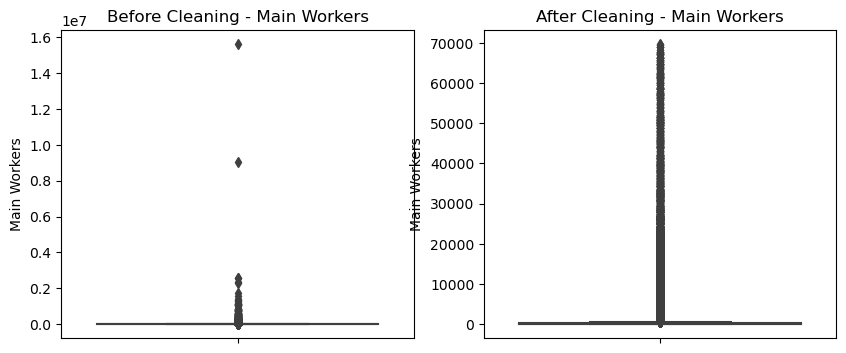

Main Workers cleaned shape: (194608, 14)
Column: Main Workers Rural
Data points before cleaning: 194608
Data points after cleaning: 190208


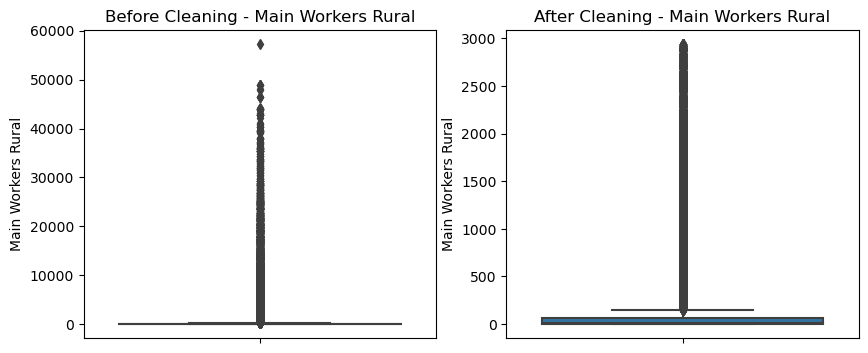

Main Workers Rural cleaned shape: (190208, 14)
Column: Main Workers Urban
Data points before cleaning: 190208
Data points after cleaning: 185939


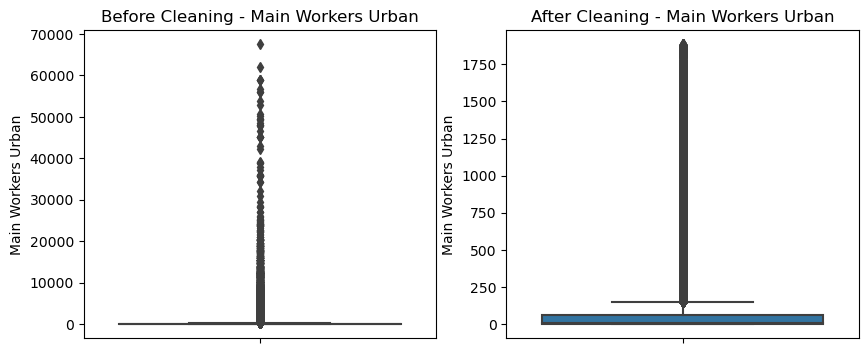

Main Workers Urban cleaned shape: (185939, 14)
Column: Marginal Workers
Data points before cleaning: 185939
Data points after cleaning: 183151


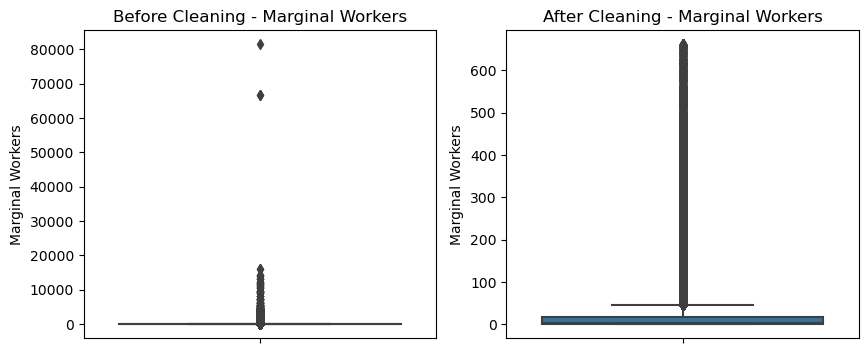

Marginal Workers cleaned shape: (183151, 14)
Column: Marginal Workers Rural
Data points before cleaning: 183151
Data points after cleaning: 174188


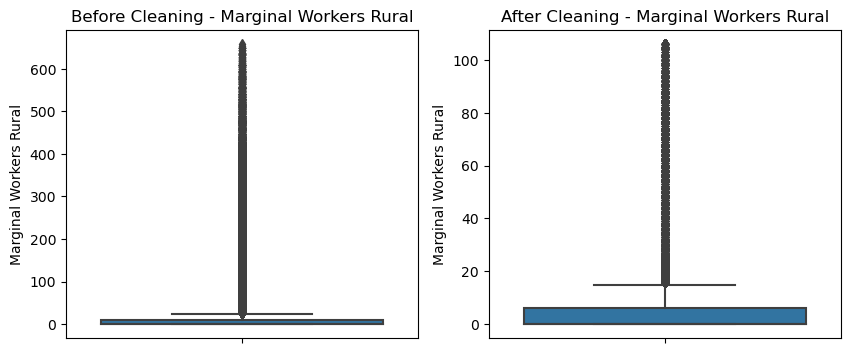

Marginal Workers Rural cleaned shape: (174188, 14)
Column: Marginal Workers Urban
Data points before cleaning: 174188
Data points after cleaning: 165940


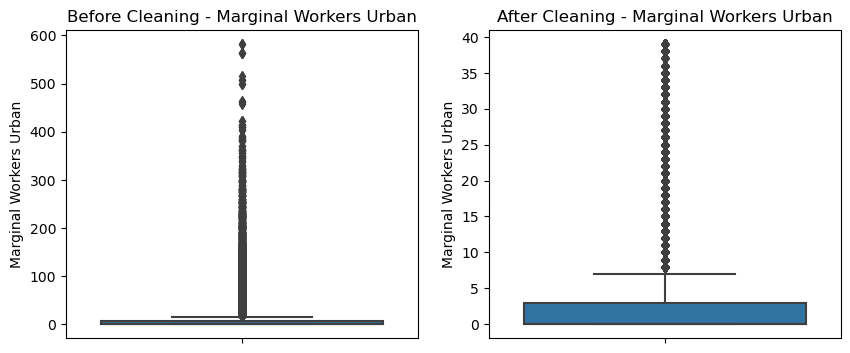

Marginal Workers Urban cleaned shape: (165940, 14)


In [21]:
def remove_outliers_zscore(df, column, threshold=1.50):
    # Calculate Z-scores
    z_scores = np.abs(stats.zscore(df[column]))
    
    # Filter out the outliers
    df_cleaned = df[z_scores < threshold]
    
    # Print the number of data points before and after cleaning
    print(f"Column: {column}")
    print(f"Data points before cleaning: {df[column].shape[0]}")
    print(f"Data points after cleaning: {df_cleaned[column].shape[0]}")
    
    # Visualize the distribution before and after
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.boxplot(y=df[column])
    plt.title(f"Before Cleaning - {column}")
    
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_cleaned[column])
    plt.title(f"After Cleaning - {column}")
    
    plt.show()
    
    return df_cleaned

columns_to_clean = [
    'Main Workers',
    'Main Workers Rural',
    'Main Workers Urban',
    'Marginal Workers',
    'Marginal Workers Rural',
    'Marginal Workers Urban',
]

# Initialize df_filtered_cleaned to df_filtered before loop starts
df = df.copy()

for column in columns_to_clean:
    df = remove_outliers_zscore(df, column, threshold=1.50)
    print(f"{column} cleaned shape: {df.shape}")


In [22]:
df

,State Code,District Code,States,Division,Group,Class,NIC_Name,Main Workers,Main Workers Rural,Main Workers Urban,Marginal Workers,Marginal Workers Rural,Marginal Workers Urban,text_cluster
4,8,0,STATE - RAJASTHAN,1,11,112,Growing of rice,79,48,31,13,11,2,0
6,8,0,STATE - RAJASTHAN,1,11,114,Growing of sugar cane,11,6,5,0,0,0,0
7,8,0,STATE - RAJASTHAN,1,11,116,Growing of fibre crops,53,41,12,76,66,10,0
8,8,0,STATE - RAJASTHAN,1,11,119,Growing of other non-perennial crop,96,50,46,69,30,39,0
10,8,0,STATE - RAJASTHAN,1,12,122,Growing of tropical and subtropical fruits,13,1,12,12,12,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195140,24,493,District - Tapi,99,0,0,Activities of extraterritorial organizations a...,216,154,62,40,26,14,1
195141,24,493,District - Tapi,99,991,0,Blank,140,84,56,16,8,8,0
195142,24,493,District - Tapi,99,991,9910,Blank,140,84,56,16,8,8,0
195143,24,493,District - Tapi,99,992,0,Incomplete description/ Wrongly Classifed,76,70,6,24,18,6,0


<Axes: >

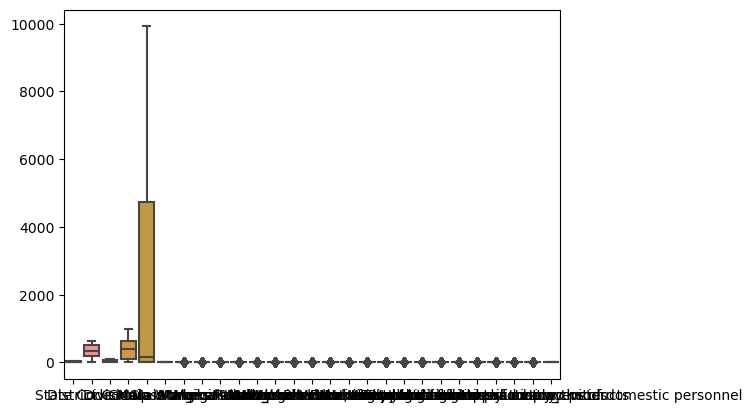

In [52]:
sns.boxplot(data =df)

In [24]:
df.to_csv("cleaned_dataset.csv", index=False)

In [25]:
grouped_df = df.groupby(['States', 'NIC_Name']).sum()


In [26]:
grouped_stats = df.groupby(['States', 'NIC_Name']).agg({
    'Main Workers': ['mean', 'std'],
    'Marginal Workers': ['mean', 'std']
})
grouped_stats

Main Workers  \
                                                                               mean   
States              NIC_Name                                                          
District - Agra     Accommodation                                               4.0   
                    Accounting, bookkeeping and auditing activities...          2.0   
                    Activities of business and employers membership...          2.0   
                    Activities of business, employers and professio...          2.0   
                    Activities of membership organizations                      2.0   
...                                                                             ...   
STATE - WEST BENGAL Treatment and disposal of non-hazardous waste              51.0   
                    Undifferentiated goods-producing activities of ...        103.0   
                    Web portals                                               102.0   
                    Wholesale of computers, computer peripheral equ...        215.0   
                    Wholesale of metals and metal ores                        168.0   

                                                                             \
                                                                        std   
States              NIC_Name                                                  
District - Agra     Accommodation                                       NaN   
                    Accounting, bookkeeping and auditing activities...  0.0   
                    Activities of business and employers membership...  NaN   
                    Activities of business, employers and professio...  NaN   
                    Activities of membership organizations              NaN   
...                                                                     ...   
STATE - WEST BENGAL Treatment and disposal of non-hazardous waste       NaN   
                    Undifferentiated goods-producing activities of ...  0.0   
                    Web portals                                         NaN   
                    Wholesale of computers, computer peripheral equ...  NaN   
                    Wholesale of metals and metal ores                  NaN   

                                                                       Marginal Workers  \
                                                                                   mean   
States              NIC_Name                                                              
District - Agra     Accommodation                                                   2.0   
                    Accounting, bookkeeping and auditing activities...              0.0   
                    Activities of business and employers membership...              0.0   
                    Activities of business, employers and professio...              0.0   
                    Activities of membership organizations                          0.0   
...                                                                                 ...   
STATE - WEST BENGAL Treatment and disposal of non-hazardous waste                   8.0   
                    Undifferentiated goods-producing activities of ...             48.0   
                    Web portals                                                    15.0   
                    Wholesale of computers, computer peripheral equ...             25.0   
                    Wholesale of metals and metal ores                              9.0   

                                                                             
                                                                        std  
States              NIC_Name                                                 
District - Agra     Accommodation                                       NaN  
                    Accounting, bookkeeping and auditing activities...  0.0  
                    Activities of business and employers membership...  NaN  
  

In [27]:
def handle_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return np.clip(column, lower_bound, upper_bound)

# Handle outliers
df['Main Workers'] = handle_outliers_iqr(df['Main Workers'])
df['Marginal Workers'] = handle_outliers_iqr(df['Marginal Workers'])

df

,State Code,District Code,States,Division,Group,Class,NIC_Name,Main Workers,Main Workers Rural,Main Workers Urban,Marginal Workers,Marginal Workers Rural,Marginal Workers Urban,text_cluster
4,8,0,STATE - RAJASTHAN,1,11,112,Growing of rice,79.0,48,31,13,11,2,0
6,8,0,STATE - RAJASTHAN,1,11,114,Growing of sugar cane,11.0,6,5,0,0,0,0
7,8,0,STATE - RAJASTHAN,1,11,116,Growing of fibre crops,53.0,41,12,30,66,10,0
8,8,0,STATE - RAJASTHAN,1,11,119,Growing of other non-perennial crop,96.0,50,46,30,30,39,0
10,8,0,STATE - RAJASTHAN,1,12,122,Growing of tropical and subtropical fruits,13.0,1,12,12,12,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195140,24,493,District - Tapi,99,0,0,Activities of extraterritorial organizations a...,182.5,154,62,30,26,14,1
195141,24,493,District - Tapi,99,991,0,Blank,140.0,84,56,16,8,8,0
195142,24,493,District - Tapi,99,991,9910,Blank,140.0,84,56,16,8,8,0
195143,24,493,District - Tapi,99,992,0,Incomplete description/ Wrongly Classifed,76.0,70,6,24,18,6,0


In [28]:
df['Main Workers'] = df['Main Workers'].replace(0, 1)
df['Marginal Workers'] = df['Marginal Workers'].replace(0, 1)

# Or, replace zeros with the median value of each column
df['Main Workers'].replace(0, df['Main Workers'].median(), inplace=True)
df['Marginal Workers'].replace(0, df['Marginal Workers'].median(), inplace=True)
df

,State Code,District Code,States,Division,Group,Class,NIC_Name,Main Workers,Main Workers Rural,Main Workers Urban,Marginal Workers,Marginal Workers Rural,Marginal Workers Urban,text_cluster
4,8,0,STATE - RAJASTHAN,1,11,112,Growing of rice,79.0,48,31,13,11,2,0
6,8,0,STATE - RAJASTHAN,1,11,114,Growing of sugar cane,11.0,6,5,1,0,0,0
7,8,0,STATE - RAJASTHAN,1,11,116,Growing of fibre crops,53.0,41,12,30,66,10,0
8,8,0,STATE - RAJASTHAN,1,11,119,Growing of other non-perennial crop,96.0,50,46,30,30,39,0
10,8,0,STATE - RAJASTHAN,1,12,122,Growing of tropical and subtropical fruits,13.0,1,12,12,12,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195140,24,493,District - Tapi,99,0,0,Activities of extraterritorial organizations a...,182.5,154,62,30,26,14,1
195141,24,493,District - Tapi,99,991,0,Blank,140.0,84,56,16,8,8,0
195142,24,493,District - Tapi,99,991,9910,Blank,140.0,84,56,16,8,8,0
195143,24,493,District - Tapi,99,992,0,Incomplete description/ Wrongly Classifed,76.0,70,6,24,18,6,0


In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

columns_to_Scale = ["Main Workers","Main Workers Rural","Main Workers Urban","Marginal Workers","Marginal Workers Rural","Marginal Workers Urban"]

df[columns_to_Scale]=scaler.fit_transform(df[columns_to_Scale])
df

,State Code,District Code,States,Division,Group,Class,NIC_Name,Main Workers,Main Workers Rural,Main Workers Urban,Marginal Workers,Marginal Workers Rural,Marginal Workers Urban,text_cluster
4,8,0,STATE - RAJASTHAN,1,11,112,Growing of rice,0.440035,0.043046,-0.144452,0.517178,0.280876,-0.211277,0
6,8,0,STATE - RAJASTHAN,1,11,114,Growing of sugar cane,-0.625079,-0.305692,-0.353027,-0.687739,-0.450177,-0.495471,0
7,8,0,STATE - RAJASTHAN,1,11,116,Growing of fibre crops,0.032785,-0.015077,-0.296872,2.224142,3.936138,0.925500,0
8,8,0,STATE - RAJASTHAN,1,11,119,Growing of other non-perennial crop,0.706313,0.059653,-0.024120,2.224142,1.543603,5.046315,0
10,8,0,STATE - RAJASTHAN,1,12,122,Growing of tropical and subtropical fruits,-0.593752,-0.347208,-0.296872,0.416768,0.347335,-0.495471,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195140,24,493,District - Tapi,99,0,0,Activities of extraterritorial organizations a...,2.061201,0.923195,0.104234,2.224142,1.277765,1.493888,1
195141,24,493,District - Tapi,99,991,0,Blank,1.395505,0.341965,0.056102,0.818407,0.081498,0.641305,0
195142,24,493,District - Tapi,99,991,9910,Blank,1.395505,0.341965,0.056102,0.818407,0.081498,0.641305,0
195143,24,493,District - Tapi,99,992,0,Incomplete description/ Wrongly Classifed,0.393045,0.225719,-0.345005,1.621684,0.746091,0.357111,0


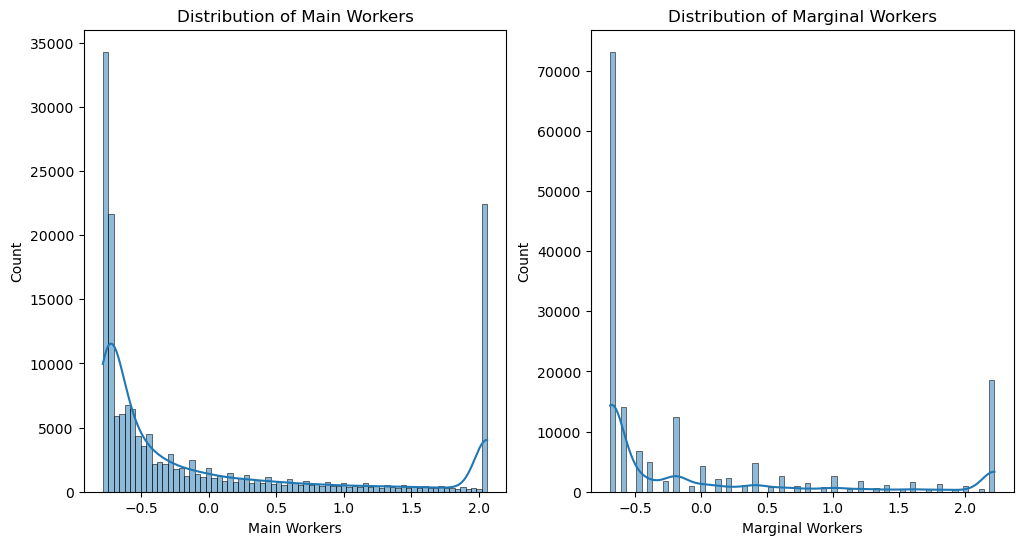

In [30]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Main Workers'], kde=True)
plt.title('Distribution of Main Workers')

plt.subplot(1, 2, 2)
sns.histplot(df['Marginal Workers'], kde=True)
plt.title('Distribution of Marginal Workers')

plt.show()

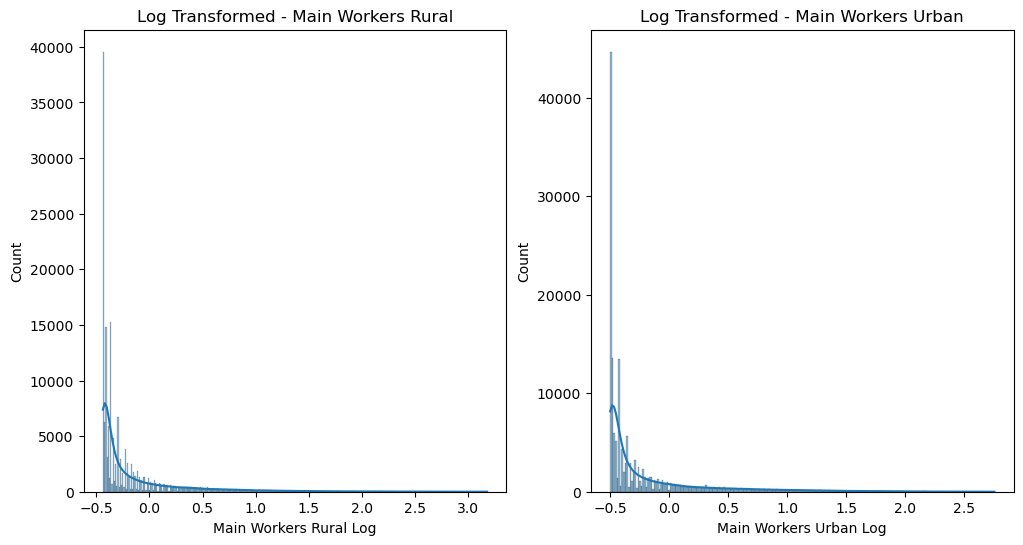

In [31]:
df['Main Workers Rural Log'] = np.log1p(df['Main Workers Rural'])
df['Main Workers Urban Log'] = np.log1p(df['Main Workers Urban'])

# Replotting to see the effect
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Main Workers Rural Log'], kde=True)
plt.title('Log Transformed - Main Workers Rural')

plt.subplot(1, 2, 2)
sns.histplot(df['Main Workers Urban Log'], kde=True)
plt.title('Log Transformed - Main Workers Urban')

plt.show()


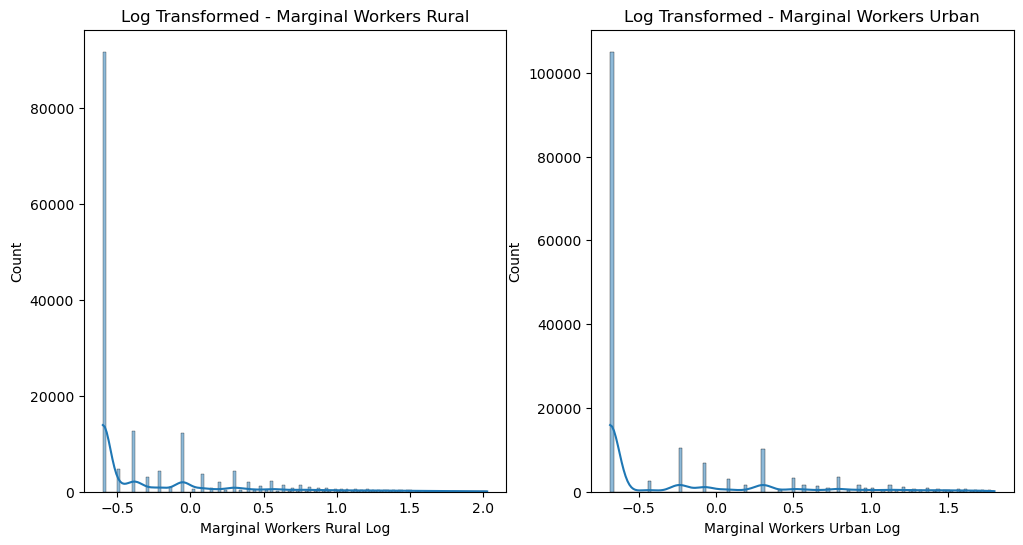

In [32]:
df['Marginal Workers Rural Log'] = np.log1p(df['Marginal Workers Rural'])
df['Marginal Workers Urban Log'] = np.log1p(df['Marginal Workers Urban'])

# Replotting to see the effect
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Marginal Workers Rural Log'], kde=True)
plt.title('Log Transformed - Marginal Workers Rural')

plt.subplot(1, 2, 2)
sns.histplot(df['Marginal Workers Urban Log'], kde=True)
plt.title('Log Transformed - Marginal Workers Urban')

plt.show()


In [33]:
df

,State Code,District Code,States,Division,Group,Class,NIC_Name,Main Workers,Main Workers Rural,Main Workers Urban,Marginal Workers,Marginal Workers Rural,Marginal Workers Urban,text_cluster,Main Workers Rural Log,Main Workers Urban Log,Marginal Workers Rural Log,Marginal Workers Urban Log
4,8,0,STATE - RAJASTHAN,1,11,112,Growing of rice,0.440035,0.043046,-0.144452,0.517178,0.280876,-0.211277,0,0.042146,-0.156013,0.247544,-0.237340
6,8,0,STATE - RAJASTHAN,1,11,114,Growing of sugar cane,-0.625079,-0.305692,-0.353027,-0.687739,-0.450177,-0.495471,0,-0.364839,-0.435451,-0.598158,-0.684131
7,8,0,STATE - RAJASTHAN,1,11,116,Growing of fibre crops,0.032785,-0.015077,-0.296872,2.224142,3.936138,0.925500,0,-0.015192,-0.352217,1.596583,0.655185
8,8,0,STATE - RAJASTHAN,1,11,119,Growing of other non-perennial crop,0.706313,0.059653,-0.024120,2.224142,1.543603,5.046315,0,0.057941,-0.024415,0.933581,1.799449
10,8,0,STATE - RAJASTHAN,1,12,122,Growing of tropical and subtropical fruits,-0.593752,-0.347208,-0.296872,0.416768,0.347335,-0.495471,0,-0.426497,-0.352217,0.298129,-0.684131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195140,24,493,District - Tapi,99,0,0,Activities of extraterritorial organizations a...,2.061201,0.923195,0.104234,2.224142,1.277765,1.493888,1,0.653988,0.099152,0.823195,0.913843
195141,24,493,District - Tapi,99,991,0,Blank,1.395505,0.341965,0.056102,0.818407,0.081498,0.641305,0,0.294135,0.054584,0.078347,0.495492
195142,24,493,District - Tapi,99,991,9910,Blank,1.395505,0.341965,0.056102,0.818407,0.081498,0.641305,0,0.294135,0.054584,0.078347,0.495492
195143,24,493,District - Tapi,99,992,0,Incomplete description/ Wrongly Classifed,0.393045,0.225719,-0.345005,1.621684,0.746091,0.357111,0,0.203527,-0.423128,0.557380,0.305358


In [34]:
ohe = OneHotEncoder()
ohe.fit(df[["NIC_Name"]].values)
pd.DataFrame((ohe.transform(df[["NIC_Name"]].values)).toarray())

,0,1,2,3,4,5,6,7,8,9,...,577,578,579,580,581,582,583,584,585,586
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165935,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
165936,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
165937,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
165938,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
for col in df.columns:
    print(col,':',len(df[col].unique())),'labels'

State Code : 23
District Code : 472
States : 491
Division : 89
Group : 241
Class : 423
NIC_Name : 587
Main Workers : 183
Main Workers Rural : 1116
Main Workers Urban : 1198
Marginal Workers : 30
Marginal Workers Rural : 107
Marginal Workers Urban : 40
text_cluster : 5
Main Workers Rural Log : 1116
Main Workers Urban Log : 1198
Marginal Workers Rural Log : 107
Marginal Workers Urban Log : 40


In [36]:
df.NIC_Name.value_counts().sort_values(ascending=False).head(20)

Water collection, treatment and supply                               1152
Veterinary activities                                                1113
Manufacture of furniture                                              891
Postal activities                                                     852
Legal activities                                                      760
Support services to forestry                                          758
Medical and dental practice activities                                754
Higher education                                                      746
Manufacture of tobacco products                                       741
Activities of households as employers of domestic personnel           735
Other human health activities                                         734
Electric power generation, transmission and distribution              730
Other social work activities without accommodation n.e.c.             720
Wired telecommunications activities   

In [37]:
top_10 = [x for x in df.NIC_Name.value_counts().sort_values(ascending=False).head(10).index]
top_10

['Water collection, treatment and supply',
 'Veterinary activities',
 'Manufacture of furniture',
 'Postal activities',
 'Legal activities',
 'Support services to forestry',
 'Medical and dental practice activities',
 'Higher education',
 'Manufacture of tobacco products',
 'Activities of households as employers of domestic personnel']

In [38]:
for label in top_10:
    df[label]=np.where(df['NIC_Name']==label,1,0)
df[['NIC_Name']+top_10].head(1090)

,NIC_Name,"Water collection, treatment and supply",Veterinary activities,Manufacture of furniture,Postal activities,Legal activities,Support services to forestry,Medical and dental practice activities,Higher education,Manufacture of tobacco products,Activities of households as employers of domestic personnel
4,Growing of rice,0,0,0,0,0,0,0,0,0,0
6,Growing of sugar cane,0,0,0,0,0,0,0,0,0,0
7,Growing of fibre crops,0,0,0,0,0,0,0,0,0,0
8,Growing of other non-perennial crop,0,0,0,0,0,0,0,0,0,0
10,Growing of tropical and subtropical fruits,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1861,Real estate activities on a fee or contract basis,0,0,0,0,0,0,0,0,0,0
1862,Legal and accounting activities,0,0,0,0,0,0,0,0,0,0
1863,Legal activities,0,0,0,0,1,0,0,0,0,0
1864,Legal activities,0,0,0,0,1,0,0,0,0,0


In [39]:
df

,State Code,District Code,States,Division,Group,Class,NIC_Name,Main Workers,Main Workers Rural,Main Workers Urban,...,"Water collection, treatment and supply",Veterinary activities,Manufacture of furniture,Postal activities,Legal activities,Support services to forestry,Medical and dental practice activities,Higher education,Manufacture of tobacco products,Activities of households as employers of domestic personnel
4,8,0,STATE - RAJASTHAN,1,11,112,Growing of rice,0.440035,0.043046,-0.144452,...,0,0,0,0,0,0,0,0,0,0
6,8,0,STATE - RAJASTHAN,1,11,114,Growing of sugar cane,-0.625079,-0.305692,-0.353027,...,0,0,0,0,0,0,0,0,0,0
7,8,0,STATE - RAJASTHAN,1,11,116,Growing of fibre crops,0.032785,-0.015077,-0.296872,...,0,0,0,0,0,0,0,0,0,0
8,8,0,STATE - RAJASTHAN,1,11,119,Growing of other non-perennial crop,0.706313,0.059653,-0.024120,...,0,0,0,0,0,0,0,0,0,0
10,8,0,STATE - RAJASTHAN,1,12,122,Growing of tropical and subtropical fruits,-0.593752,-0.347208,-0.296872,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195140,24,493,District - Tapi,99,0,0,Activities of extraterritorial organizations a...,2.061201,0.923195,0.104234,...,0,0,0,0,0,0,0,0,0,0
195141,24,493,District - Tapi,99,991,0,Blank,1.395505,0.341965,0.056102,...,0,0,0,0,0,0,0,0,0,0
195142,24,493,District - Tapi,99,991,9910,Blank,1.395505,0.341965,0.056102,...,0,0,0,0,0,0,0,0,0,0
195143,24,493,District - Tapi,99,992,0,Incomplete description/ Wrongly Classifed,0.393045,0.225719,-0.345005,...,0,0,0,0,0,0,0,0,0,0


In [40]:
df = df.drop(columns=['NIC_Name'])

In [41]:
df

,State Code,District Code,States,Division,Group,Class,Main Workers,Main Workers Rural,Main Workers Urban,Marginal Workers,...,"Water collection, treatment and supply",Veterinary activities,Manufacture of furniture,Postal activities,Legal activities,Support services to forestry,Medical and dental practice activities,Higher education,Manufacture of tobacco products,Activities of households as employers of domestic personnel
4,8,0,STATE - RAJASTHAN,1,11,112,0.440035,0.043046,-0.144452,0.517178,...,0,0,0,0,0,0,0,0,0,0
6,8,0,STATE - RAJASTHAN,1,11,114,-0.625079,-0.305692,-0.353027,-0.687739,...,0,0,0,0,0,0,0,0,0,0
7,8,0,STATE - RAJASTHAN,1,11,116,0.032785,-0.015077,-0.296872,2.224142,...,0,0,0,0,0,0,0,0,0,0
8,8,0,STATE - RAJASTHAN,1,11,119,0.706313,0.059653,-0.024120,2.224142,...,0,0,0,0,0,0,0,0,0,0
10,8,0,STATE - RAJASTHAN,1,12,122,-0.593752,-0.347208,-0.296872,0.416768,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195140,24,493,District - Tapi,99,0,0,2.061201,0.923195,0.104234,2.224142,...,0,0,0,0,0,0,0,0,0,0
195141,24,493,District - Tapi,99,991,0,1.395505,0.341965,0.056102,0.818407,...,0,0,0,0,0,0,0,0,0,0
195142,24,493,District - Tapi,99,991,9910,1.395505,0.341965,0.056102,0.818407,...,0,0,0,0,0,0,0,0,0,0
195143,24,493,District - Tapi,99,992,0,0.393045,0.225719,-0.345005,1.621684,...,0,0,0,0,0,0,0,0,0,0


In [42]:
df.columns  # To view all column names
df.describe(include='all')  # Get an overview of the data
df['States'].value_counts()  # Check the distribution of data across states


District - Aurangabad       603
District - Pratapgarh       590
District - West             543
District - Raigarh          541
STATE - HIMACHAL PRADESH    538
                           ... 
District - Kaushambi         12
District - Mahe              12
District - Kannauj           10
District - Mainpuri           5
District - Baghpat            4
Name: States, Length: 491, dtype: int64

C:\Users\deepa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


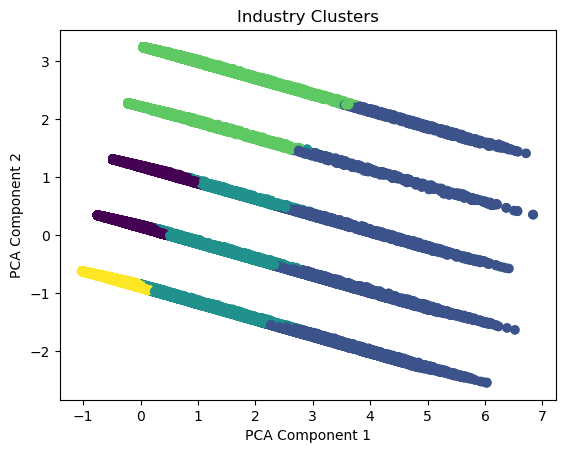

In [43]:
industry_columns = df.columns[11:]  # Assuming the industry columns start from the 12th column onward
industry_data = df[industry_columns]

# Applying KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # You can adjust the number of clusters
df['industry_cluster'] = kmeans.fit_predict(industry_data)

# Optional: Visualizing clusters
pca = PCA(n_components=2)
industry_data_pca = pca.fit_transform(industry_data)
plt.scatter(industry_data_pca[:, 0], industry_data_pca[:, 1], c=df['industry_cluster'])
plt.title('Industry Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [44]:
df.groupby('industry_cluster').sum().T

C:\Users\deepa\AppData\Local\Temp\ipykernel_20740\1517175398.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('industry_cluster').sum().T


industry_cluster,0,1,2,3,4
State Code,9.315820e+05,2.291390e+05,4.575370e+05,3.019470e+05,1.259091e+06
District Code,1.677584e+07,3.840248e+06,7.805468e+06,5.494279e+06,2.246729e+07
Division,3.231535e+06,5.701310e+05,1.126474e+06,5.163420e+05,2.290123e+06
Group,2.696068e+07,4.610168e+06,9.141874e+06,4.447215e+06,2.070170e+07
Class,1.562081e+08,2.554902e+07,5.262508e+07,2.578535e+07,1.343943e+08
Main Workers,-1.772885e+04,1.986576e+04,2.573086e+04,-4.772786e+02,-2.739049e+04
Main Workers Rural,-1.135422e+04,1.467513e+04,1.207285e+04,7.019896e+01,-1.546396e+04
Main Workers Urban,-1.348015e+04,2.361377e+04,1.185593e+04,-2.182868e+03,-1.980668e+04
Marginal Workers,-2.253711e+04,2.284849e+04,2.445898e+04,7.853526e+02,-2.555571e+04
Marginal Workers Rural,-1.464022e+04,1.350589e+04,1.402646e+04,1.677701e+03,-1.456983e+04


In [45]:
df

,State Code,District Code,States,Division,Group,Class,Main Workers,Main Workers Rural,Main Workers Urban,Marginal Workers,...,Veterinary activities,Manufacture of furniture,Postal activities,Legal activities,Support services to forestry,Medical and dental practice activities,Higher education,Manufacture of tobacco products,Activities of households as employers of domestic personnel,industry_cluster
4,8,0,STATE - RAJASTHAN,1,11,112,0.440035,0.043046,-0.144452,0.517178,...,0,0,0,0,0,0,0,0,0,4
6,8,0,STATE - RAJASTHAN,1,11,114,-0.625079,-0.305692,-0.353027,-0.687739,...,0,0,0,0,0,0,0,0,0,4
7,8,0,STATE - RAJASTHAN,1,11,116,0.032785,-0.015077,-0.296872,2.224142,...,0,0,0,0,0,0,0,0,0,2
8,8,0,STATE - RAJASTHAN,1,11,119,0.706313,0.059653,-0.024120,2.224142,...,0,0,0,0,0,0,0,0,0,1
10,8,0,STATE - RAJASTHAN,1,12,122,-0.593752,-0.347208,-0.296872,0.416768,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195140,24,493,District - Tapi,99,0,0,2.061201,0.923195,0.104234,2.224142,...,0,0,0,0,0,0,0,0,0,2
195141,24,493,District - Tapi,99,991,0,1.395505,0.341965,0.056102,0.818407,...,0,0,0,0,0,0,0,0,0,2
195142,24,493,District - Tapi,99,991,9910,1.395505,0.341965,0.056102,0.818407,...,0,0,0,0,0,0,0,0,0,2
195143,24,493,District - Tapi,99,992,0,0.393045,0.225719,-0.345005,1.621684,...,0,0,0,0,0,0,0,0,0,2


In [46]:
# Assuming 'industry_cluster' or another column is your target variable
X = df.drop(columns=['industry_cluster'])  # Features
y = df['industry_cluster']  # Target variable

# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
categorical_cols = ['States']  # Replace with your actual categorical columns

# One-Hot Encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)],
    remainder='passthrough')  # Keep other columns unchanged

# Apply the transformation to X_train and X_test
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

In [48]:
# Initialize and train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_encoded, y_train)

# Predictions on the test set
y_pred = rf_model.predict(X_test_encoded)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10059
           1       0.99      0.98      0.99      2228
           2       0.98      0.99      0.98      4454
           3       1.00      1.00      1.00      3101
           4       1.00      1.00      1.00     13346

    accuracy                           1.00     33188
   macro avg       0.99      0.99      0.99     33188
weighted avg       1.00      1.00      1.00     33188

[[10025     0    34     0     0]
 [    0  2187    38     3     0]
 [   14    15  4401     0    24]
 [    0    10     0  3091     0]
 [    0     0    17     0 13329]]


In [49]:
df.to_csv("final_dataset.csv", index=False)